## Crop Recommendations Visualization

In [8]:
# Import necessary libraries
import pandas as pd
from pymongo import MongoClient
import matplotlib.pyplot as plt
import plotly.express as px
import folium
from IPython.display import display

# Connect to MongoDB
client = MongoClient("mongodb://localhost:27017/")  # Adjust the URL as needed
db = client['crop_database']  # Replace with your database name
collection = db['crops']  # Replace with your collection name

# Retrieve the data from MongoDB
data = list(collection.find())

# Convert to Pandas DataFrame
df = pd.DataFrame(data)

# Drop MongoDB-specific `_id` field if present
if '_id' in df.columns:
    df.drop(columns=['_id'], inplace=True)

## Matplotlib

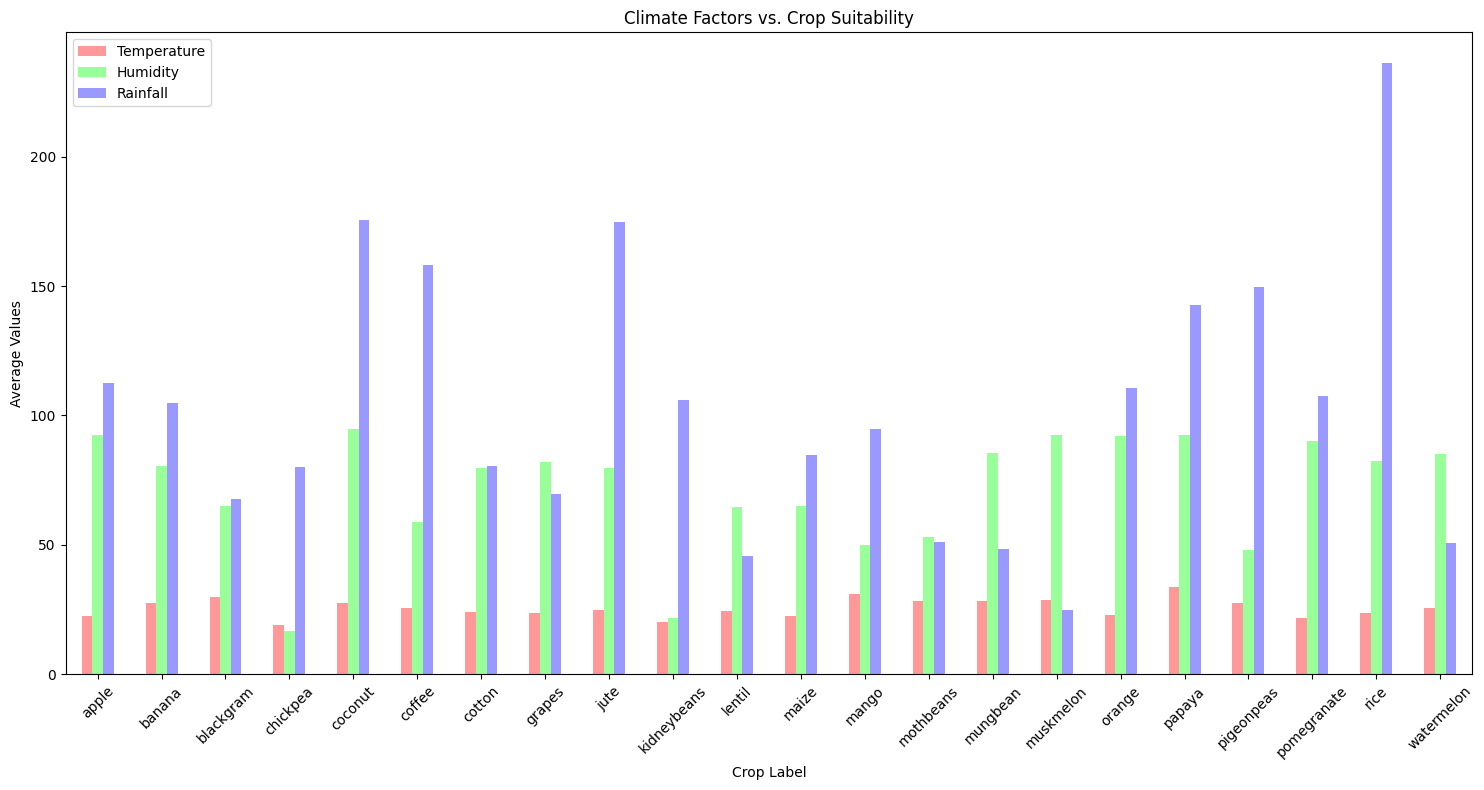

<Figure size 1200x800 with 0 Axes>

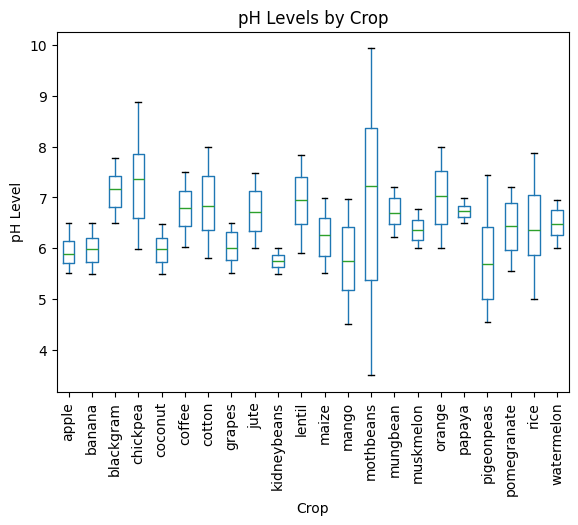

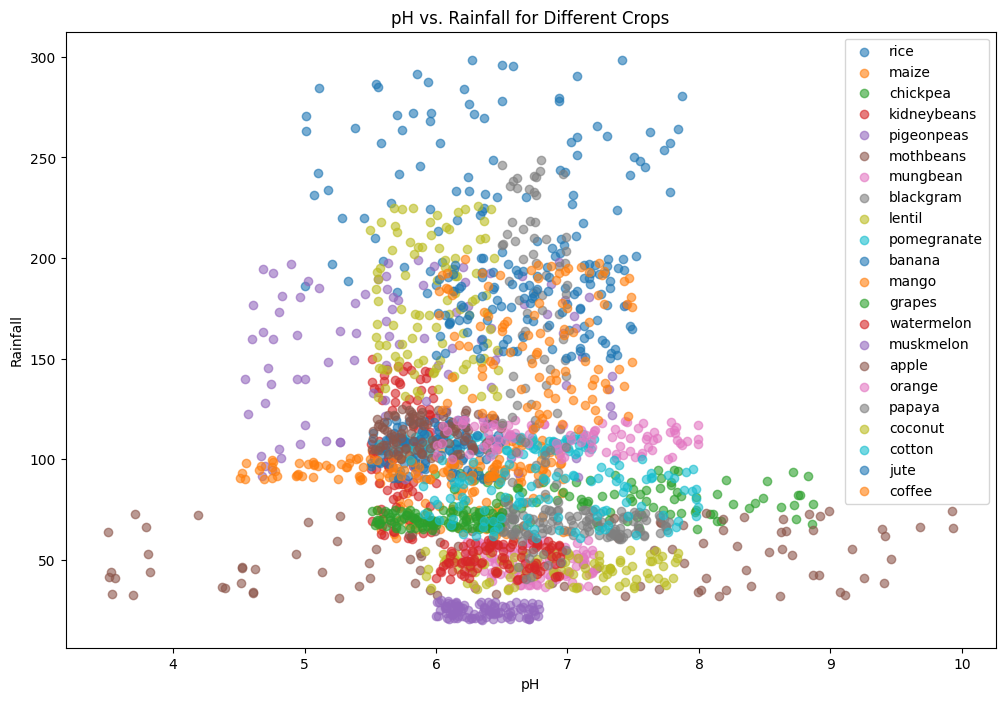

In [22]:
# Average climate factors by crop
avg_factors = df.groupby('label')[['temperature', 'humidity', 'rainfall']].mean()
custom_colors = ['#FF9999', '#99FF99', '#9999FF'] 

avg_factors.plot(kind='bar', figsize=(15, 8),  color=custom_colors)
plt.title('Climate Factors vs. Crop Suitability')
plt.ylabel('Average Values')
plt.xlabel('Crop Label')
plt.xticks(rotation=45)
plt.legend(['Temperature', 'Humidity', 'Rainfall'])
plt.tight_layout()
plt.show()

#distribution of pH values for different crops
plt.figure(figsize=(12, 8))
df.boxplot(column='ph', by='label', grid=False, rot=90)
plt.title('pH Levels by Crop')
plt.suptitle("")  
plt.ylabel('pH Level')
plt.xlabel('Crop')
plt.show()

# pH vs. Rainfall for All Crops
plt.figure(figsize=(12, 8))

for crop in df['label'].unique():
    crop_data = df[df['label'] == crop]
    plt.scatter(crop_data['ph'], crop_data['rainfall'], label=crop, alpha=0.6)

plt.title('pH vs. Rainfall for Different Crops')
plt.xlabel('pH')
plt.ylabel('Rainfall')
plt.legend()
plt.show()

## Plotly

In [20]:
# Average N, P, K by crop
avg_nutrients = df.groupby('label')[['N', 'P', 'K']].mean().reset_index()

fig = px.line(avg_nutrients, x='label', y=['N', 'P', 'K'],
              title="Soil Nutrients vs. Crop Suitability",
              labels={'value': 'Average Value', 'label': 'Crop'},
              markers=True)
fig.show()

#hierarchical data with crops grouped by locations.
fig = px.treemap(df, path=['location', 'label'], values='rainfall',
                 title='Treemap: Crop Distribution by Location and Rainfall')
fig.show()

#Analyze multi-dimensional relationships between features like temperature, humidity, and rainfall
fig = px.parallel_coordinates(
    df, 
    dimensions=['temperature', 'humidity', 'rainfall', 'ph'],
    color='rainfall',
    title='Parallel Coordinates Plot: Climate Factors',
    labels={'ph': 'pH', 'temperature': 'Temperature', 'humidity': 'Humidity', 'rainfall': 'Rainfall'}
)
fig.show()

## Folium

In [28]:
from folium.plugins import MarkerCluster

# Create a base map centered at an average latitude and longitude
crop_map = folium.Map(location=[20, 78], zoom_start=3)  # Adjust starting location and zoom as needed

# Add a marker cluster for better visualization
marker_cluster = MarkerCluster().add_to(crop_map)

# Iterate through the DataFrame and add markers for each crop
for index, row in df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=folium.Popup(f"Crop: {row['label']}<br>Temperature: {row['temperature']}°C<br>Rainfall: {row['rainfall']}mm", max_width=300),
        icon=folium.Icon(color="green", icon="info-sign")
    ).add_to(marker_cluster)

# Save the map to an HTML file (optional)
crop_map.save("Crop_Distribution_Map.html")

# Display the map
# Open the map file manually in a browser to view the map
print("Map saved as 'cities.html'. Open it in a browser to view.")
display(map)


Map saved as 'cities.html'. Open it in a browser to view.
